# Project brief

The purpose of this project is to analyze a heart disease prediction dataset. The goal of the assignment is to predict whether someone will suffer from a heart attack. We will get different statistics for some of the variables included in the dataset, get some correlations between them and at the end use supervised and unsupervised learning algorithms to predict outcomes and make conclusions.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load the dataset 'heart.csv'
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Exploratory data analysis

In [5]:
#average
df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [6]:
#median
df.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [7]:
#standard deviation
df.std()

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

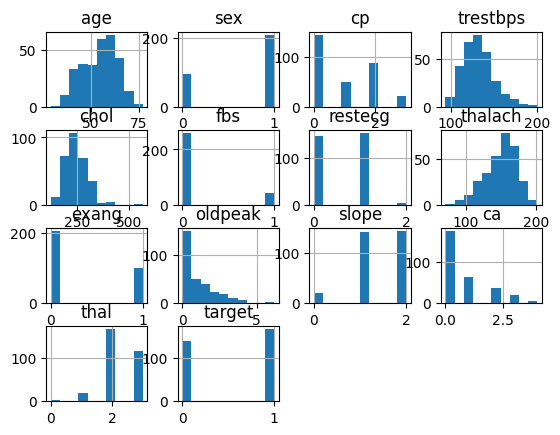

In [8]:
#histograms for every variable in the dataset
df.hist()

<Axes: >

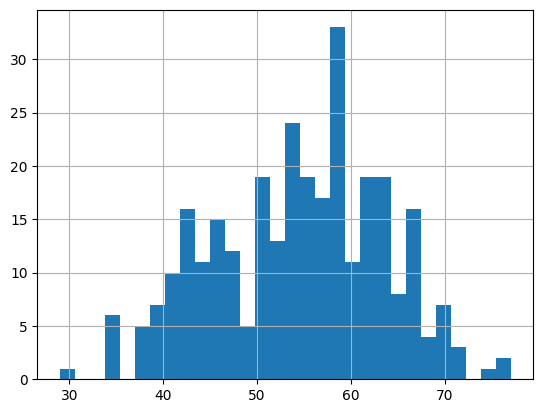

In [9]:
# age histogram
df['age'].hist(bins=30)

<Axes: >

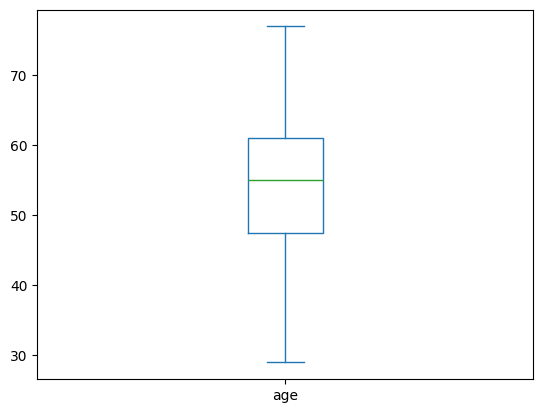

In [10]:
# age boxplot
df['age'].plot(kind='box')


Going into a deeper analysis of the variables available, regarding the variable of 'age', looking the statistics we found above, 
we have a mean of 54.4 and a median of 55. Since mean and median are very close to each other,that gives us the conlcusion that age 
follows a normal distribution (it is almost symmetric). This can be seen also from the histogram above. Also, we can see 
from the boxplot that there are no outliers, giving us again the conclusion that 'age' follows a normal distribution, almost zero skewness.



<Axes: >

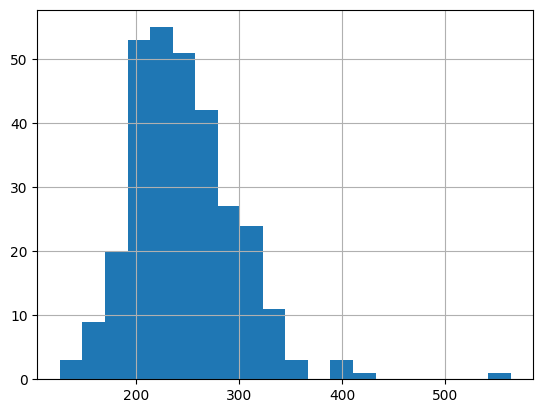

In [11]:
#cholesterol (chol) histogram
df['chol'].hist(bins=20) 

<Axes: >

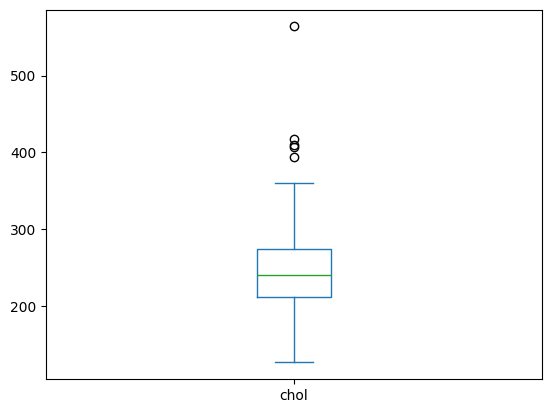

In [12]:
#cholesterol (chol) boxplot
df['chol'].plot(kind='box')


Looking at the variable of 'chol' now, we get a mean of 246.3 and a median of 240. We can say that the two values of mean and median are not so 
close and this gives us the conclusion that the variable of 'chol' follows a skewed distribution and more precisely a positively skewed distribution. 
This can be identified from the histogram above but also from the boxplot where we can notice that there are some outliers. 




Depending on the variable, not all plots can be helpful to analyze and understand your data. An example of this is the variable 'sex' in our
dataset where a boxplot for example wouldn't be representable to understand the data. However, a pie chart or a bar chart would be a good choice to
look at your data and get useful information you might need.



In [13]:
# Getting the number of female and male individuals in our dataset. Normally we assign 1 for male and 0 for female.
sex = df.groupby('sex').size()
sex.index = sex.index.map({0:'Female', 1: 'Male'})
sex

sex
Female     96
Male      207
dtype: int64

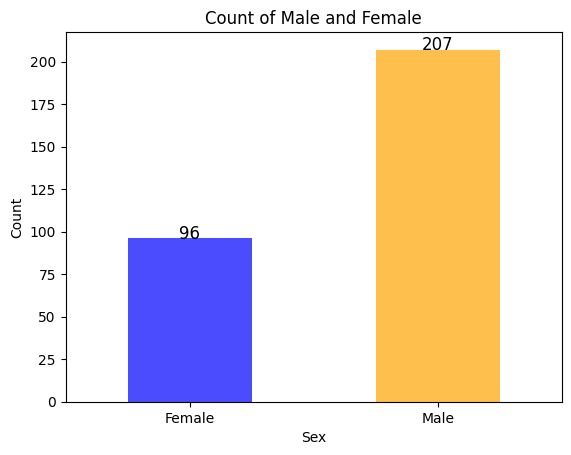

In [14]:
# Create the bar plot
sex_plot = sex.plot(kind='bar', color=['blue','orange'], alpha=0.7)

# Add data labels
for i, value in enumerate (sex):
    plt.text(i, value + 0.1, str(value), ha='center', fontsize=12)

# Set x-axis labels horizontally
plt.xticks(ticks=range(len(sex)), labels=['Female','Male'], rotation=0)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Male and Female')

# Show the plot
plt.show()

### Correlation Coefficients

In this part of the project, we can check different correlations between our variables and more specifically the linear relationships between
them. For example, we can explore the relationship between 'age' and 'chol' where cholesterol levels may increase with age or 'sex' and 'target' where heart disease risk differs between males(1) and females(0). 

In [15]:
# correlation coefficient table
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


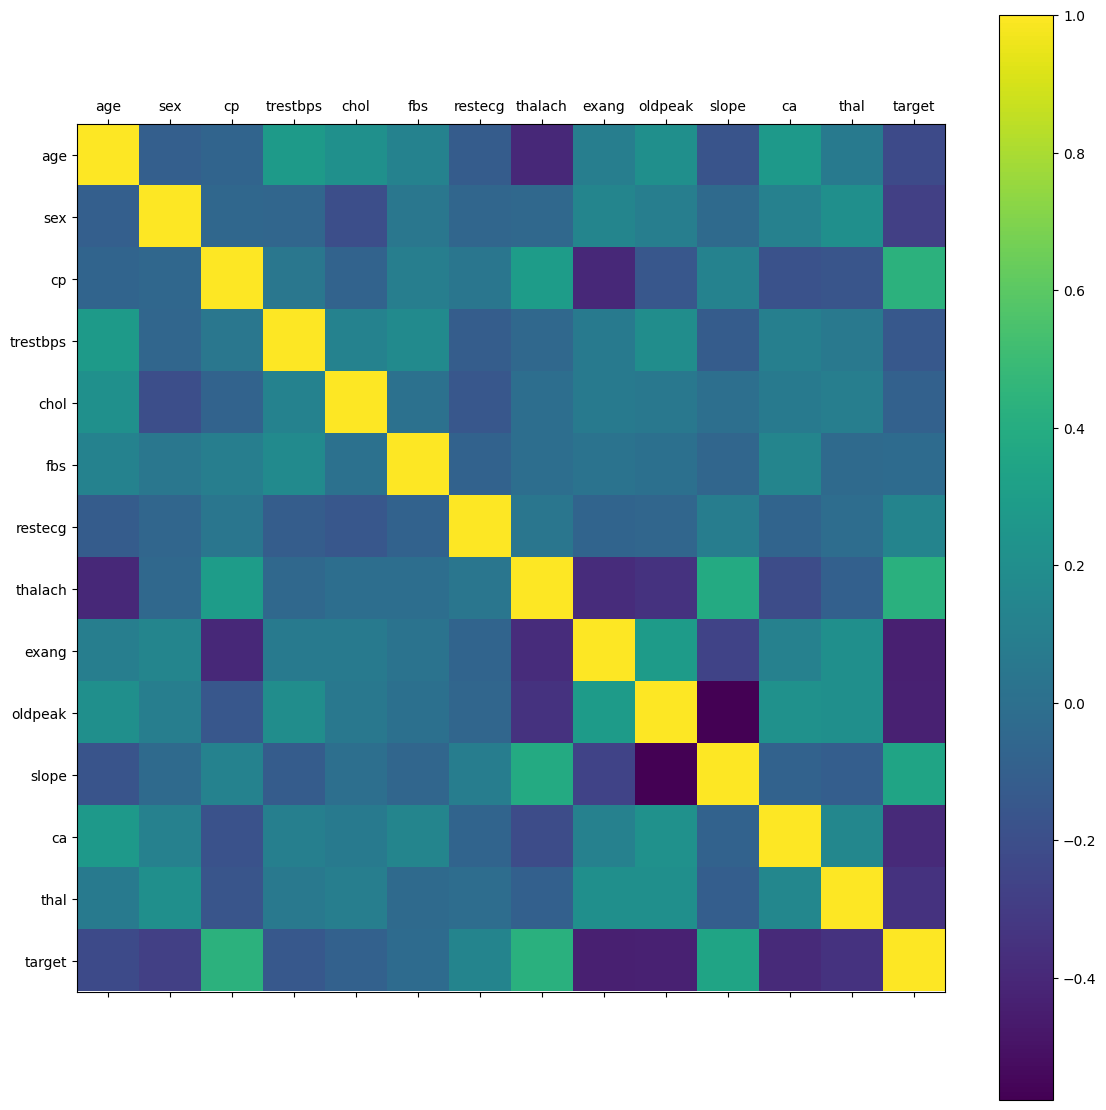

In [16]:
# heatmap-like plot
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

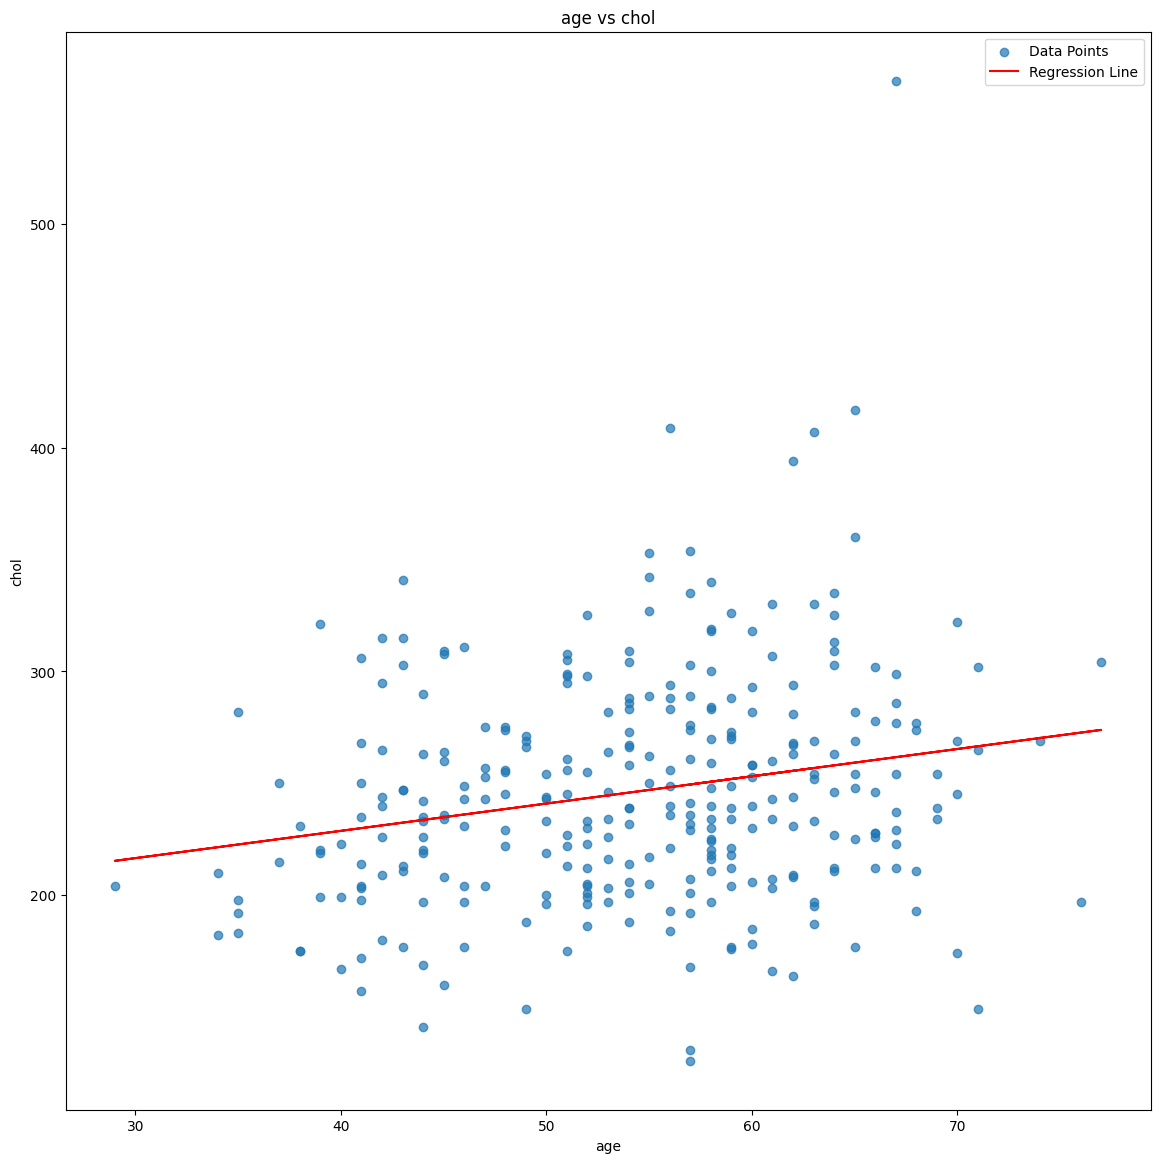

In [17]:
# ScatterPlot: Age vs Cholesterol

# Create scatter plot
plt.scatter(df['age'],df['chol'], label='Data Points', alpha=0.7)

# Calculate regression line
x = df['age']
y = df['chol']

# Perform linear regression
slope, intercept = np.polyfit(x,y,1) # 1 indicates a linear fit
regression_line = slope * x + intercept # Computes the y-values of the regression line using the equation y=mx+b where m is theslope and b is the intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.xlabel('age')
plt.ylabel('chol')
plt.title('age vs chol')
plt.legend()
plt.show()

In [18]:
# Correlation Coefficient 'age' vs 'chol'
df['age'].corr(df['chol']).round(3)

np.float64(0.214)

Looking above at the value of the correlation coefficient of 'age' vs 'chol', we can see that the two variables have a positive correlation however it is not the perfect one as the value (0.21) is closer to 0 than 1. 
From the scatterplot we can see that the most of the data points show that as age gets larger, cholesterol levels increase as well.


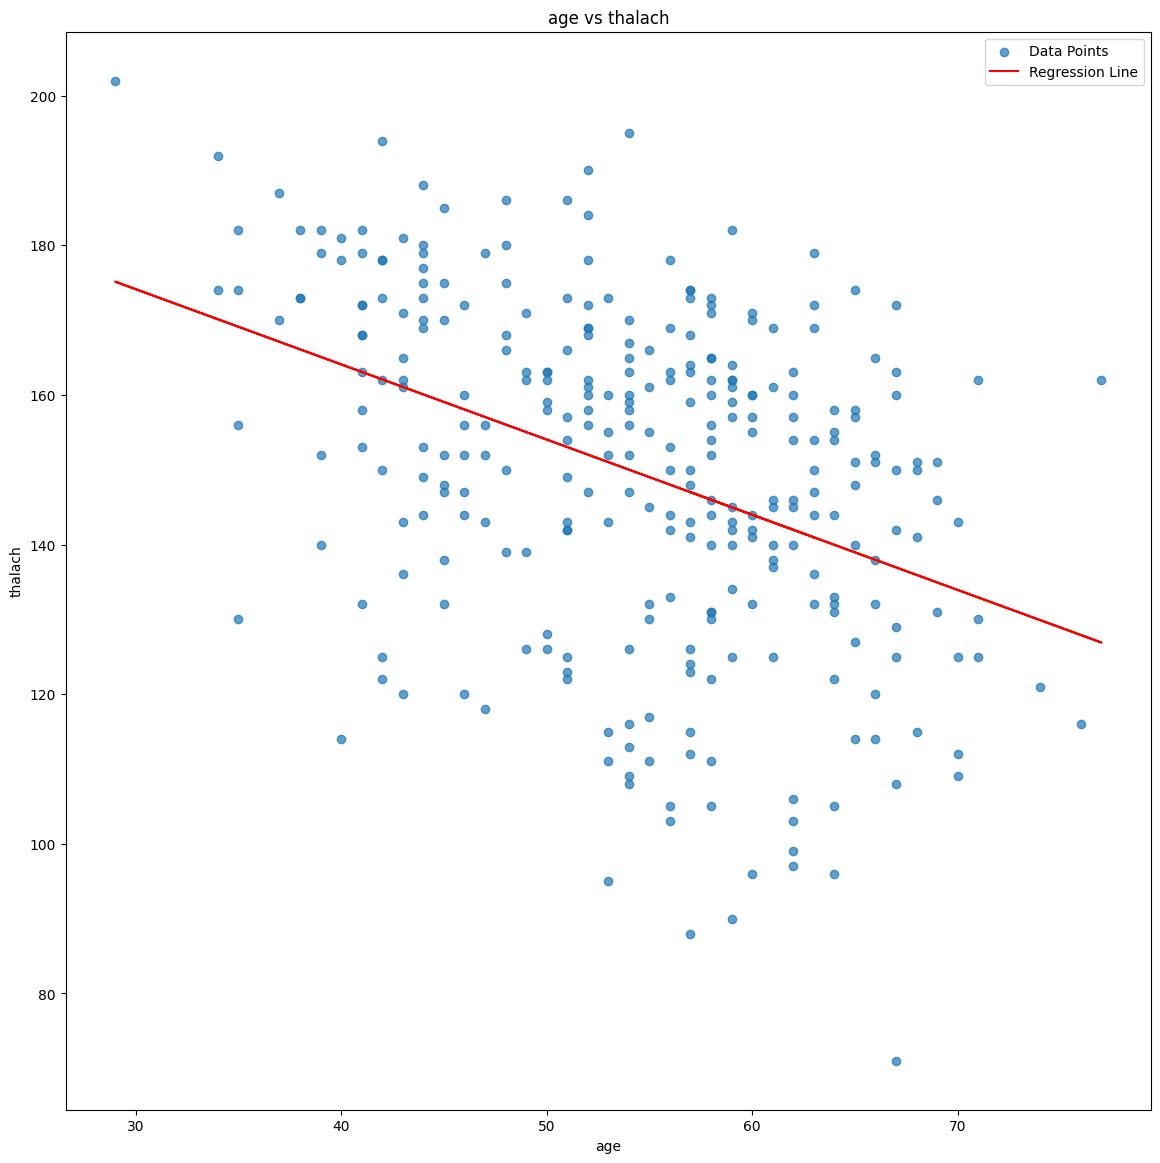

In [19]:
# ScatterPlot: Age vs Thalach (Maximum heart rate achieved)

# Create scatter plot
plt.scatter(df['age'],df['thalach'], label='Data Points', alpha=0.7)

# Calculate regression line
x = df['age']
y = df['thalach']

# Perform linear regression
slope, intercept = np.polyfit(x,y,1) # 1 indicates a linear fit
regression_line = slope * x + intercept # Computes the y-values of the regression line using the equation y=mx+b where m is theslope and b is the intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.xlabel('age')
plt.ylabel('thalach')
plt.title('age vs thalach')
plt.legend()
plt.show()

In [20]:
# Correlation Coefficient 'age' vs 'thalach'
df['age'].corr(df['thalach']).round(3)

np.float64(-0.399)

For the above relationship, 'age' vs 'thalach', we can see from the correlation coefficient (-0.399) that there is a negative correlation between them. This shows that as age is increasing most of the data points have a decreasing maximum heart rate.

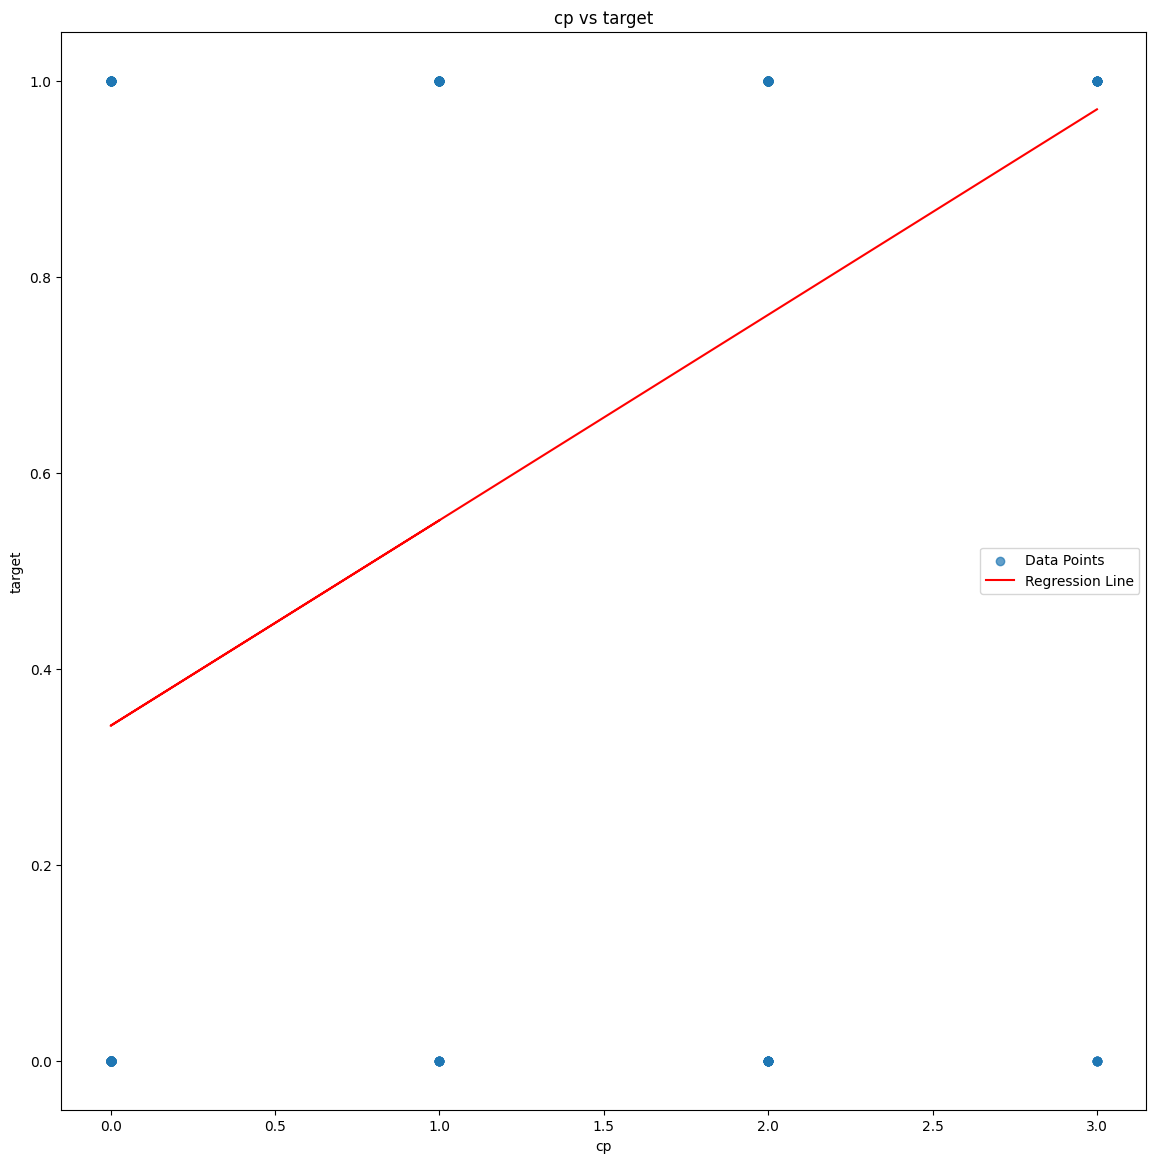

In [21]:
# ScatterPlot: Cp (chest pain) vs Target (heart attack)

# Create scatter plot
plt.scatter(df['cp'],df['target'], label='Data Points', alpha=0.7)

# Calculate regression line
x = df['cp']
y = df['target']

# Perform linear regression
slope, intercept = np.polyfit(x,y,1) # 1 indicates a linear fit
regression_line = slope * x + intercept # Computes the y-values of the regression line using the equation y=mx+b where m is theslope and b is the intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.xlabel('cp')
plt.ylabel('target')
plt.title('cp vs target')
plt.legend()
plt.show()

In [22]:
# Correlation Coefficient 'cp' vs 'target'
df['cp'].corr(df['target']).round(3)

np.float64(0.434)

The correlation coefficient of cp (chest pain) and our target is 0.43. We can see there is a positive correlation between them and this is logical as the more chest pains you have, it results to increase your chance of having a heart disease.

### Unsupervised Learning

In this section we will perform the K-Means algorithm, visualize the different clusters and demonstrate whether they can be separated or not.

In [45]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in our dataset.')

There are 303 rows and 14 columns in our dataset.


In [24]:
df.info() # there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
# Summary of statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
# sklearn library provides machine learning tools, including the KMeans clustering we will use.
import sklearn 
from sklearn.cluster import KMeans

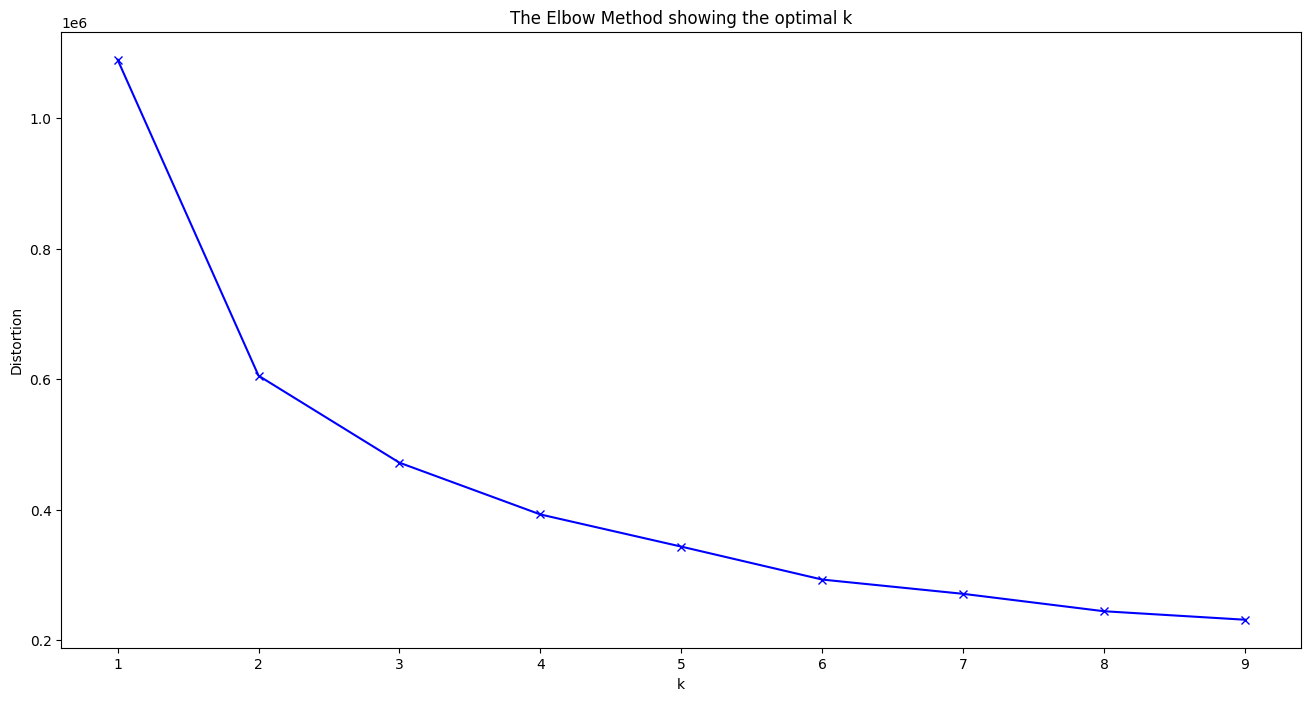

In [27]:
# Finding the Optimal Number of clusters using the Elbow Method
distortions = []
K = range(1,10)  #defines a range of cluster numbers (from 1 to 9) to test
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_) #measures how well the data points fit their clusters. Lower inertia means better clustering.

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The purpose is to visualize the distortions for different k values to determine the optimal number of clusters. We have to look for a "knee" or "elbow" point where distortion decreases sharply and levels off.
We can see using the elbow method that the "elbow" in this case is number 2 which is the optimal case. So we can run a KMeans with the number of clusters equal to 2.

In [28]:
# Selecting variables for clustering
X=df[['age','chol']] 

In [29]:
# Fitting KMeans and assigning clusters
model=KMeans(2)   # initializes a KMeans model with 2 clusters
cluster_centers=model.fit_predict(X)   # learns the cluster centers for the data and assigns each data point to the nearest cluster

In [30]:
sklearn.metrics.silhouette_score(X,cluster_centers)

np.float64(0.5272399836976794)

The Silhouette Score measures how well-seperated the clusters are and how compact the clusters are. It ranges from -1 to 1 with perfect clustering number 1 and points assigned to incorrect cluster with number -1.
With the silhouette score of 0.53 we can say that there is a good level of separation between clusters at optimal k=2.

Text(0.5, 1.0, 'Clustering of age vs chol')

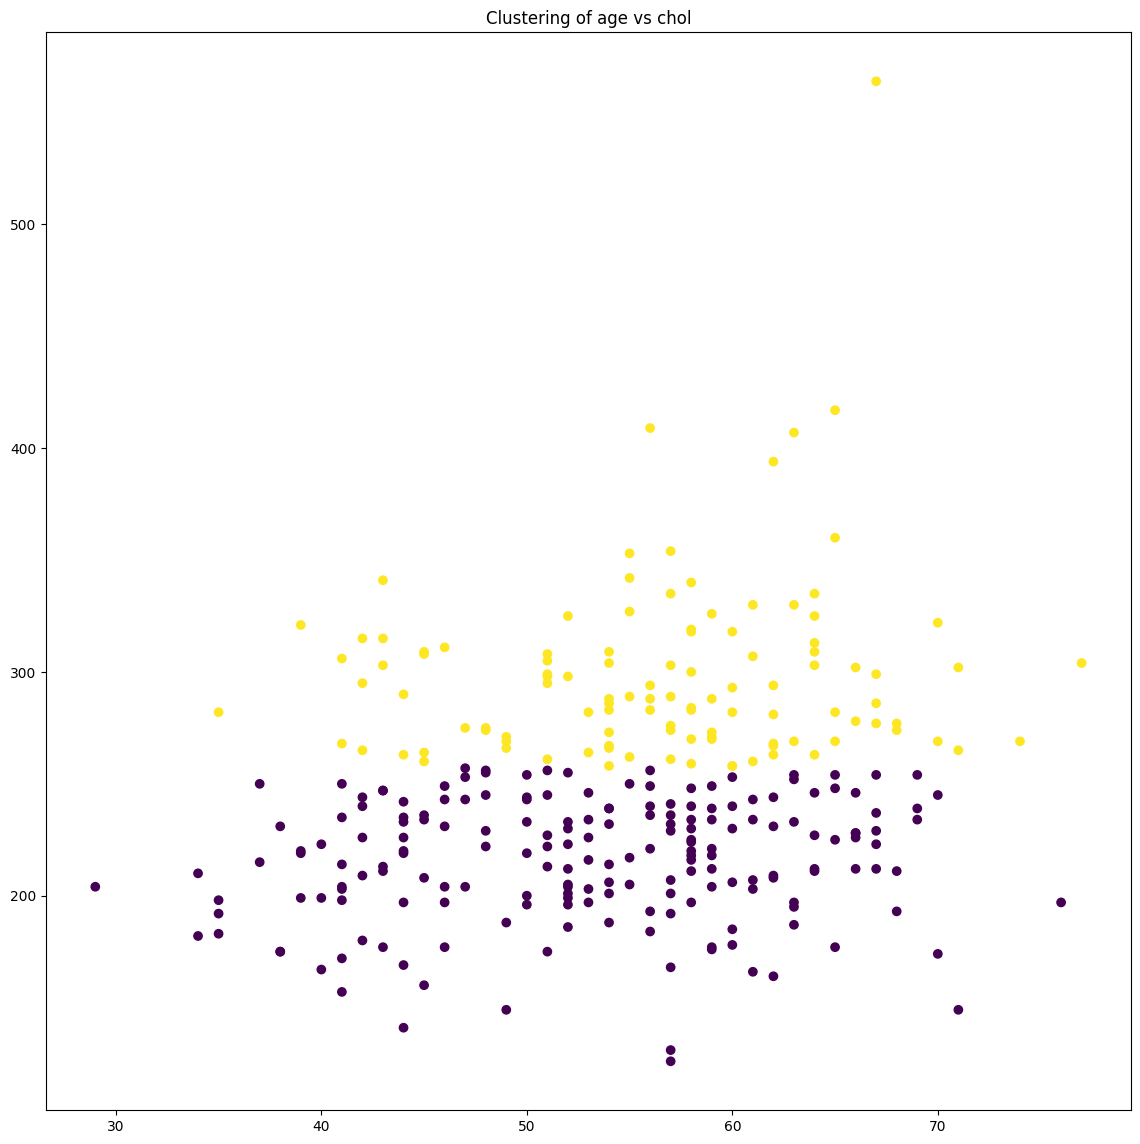

In [31]:
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values,c=cluster_centers)
plt.title('Clustering of age vs chol')

### Supervised Learning

Create a pipeline with 1 classifier, and also include PCA into the mix! Use cross-validation and the f1-score to measure performance of the results

In [32]:
# Prepare data, assign, seperate and standardize
from sklearn.decomposition import PCA  # Principal Component Analysis
from sklearn.preprocessing import StandardScaler    # Standardizes the data by transforming it to have a mean of 0 and a standard deviation of 1
from sklearn.pipeline import Pipeline     # Combines multiple steps (e.g., scaling, PCA, and model fitting) into a single workflow
from sklearn.linear_model import LogisticRegression   # A supervised learning algorithm used for binary classification
from sklearn.model_selection import train_test_split   # Splits the dataset into training and testing sets
from sklearn.metrics import classification_report      # Provides a detailed report of classification metrics (precision, recall, F1 score, etc.)

In [33]:
#the first 13 columns are assigned to X and the last column is assigned to y
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [34]:
#we need to seperate the data set into the training set and the test set
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [35]:
scaler = StandardScaler()
pca=PCA(2)
clf=LogisticRegression()

In [36]:
#If we normalize the data there would be a transformation so that there is a distribution with 0 mean and standard deviation of 1.
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
pipeline=Pipeline([('scaler',scaler),('pca',pca),('clf',clf)]) 
pipeline.fit(x_train, y_train) #train & fit of the model

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression())])

In [38]:
results= sklearn.model_selection.cross_val_score(pipeline,x_train,y_train,cv=10,scoring='f1') # calculates the F1 score for each fold
results

array([0.8       , 0.88      , 0.83870968, 0.82758621, 0.92857143,
       0.81481481, 0.92307692, 0.7826087 , 0.64      , 0.92857143])

In [39]:
predictions=sklearn.model_selection.cross_val_predict(pipeline,x_train,y_train,cv=10)

In [40]:
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [41]:
np.mean(results)

np.float64(0.8363939175002676)

In [43]:
predictions = pipeline.predict(x_test)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### Supervised Learning II

Let's repeat the same process but with the classifier of Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Define the pipeline with scaling, PCA and Random Forest
pipeline2 = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', RandomForestClassifier(random_state=1))
])
pipeline2.fit(x_train, y_train)  # train the pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', RandomForestClassifier(random_state=1))])

In [54]:
# Cross-validation
results2 = sklearn.model_selection.cross_val_score(pipeline2, x_train, y_train, cv=10, scoring='f1')
results2

array([0.70967742, 0.76923077, 0.77419355, 0.74074074, 0.84615385,
       0.72      , 0.84615385, 0.76923077, 0.61538462, 0.92307692])

In [56]:
# Predictions
predictions2 = pipeline2.predict(x_test)

In [58]:
# Output results
print("Cross-validation F1 scores:", results2)
print("Mean F1 score:", results2.mean())
print("Classification Report:\n", classification_report(y_test, predictions2))

Cross-validation F1 scores: [0.70967742 0.76923077 0.77419355 0.74074074 0.84615385 0.72
 0.84615385 0.76923077 0.61538462 0.92307692]
Mean F1 score: 0.7713842477713445
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.77      0.79      0.78        34

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

